In [1]:
import pandas as pd
import numpy as np
import hiplot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend import Legend

import networkx as nx

In [2]:
name_mapping = {
    '0G': '0G',
    '1G-Ss-Dp': '1G',
    # '1-2G-DirectedEncoded': 'HG-DE',
    '1-2G-DirectedEncoded': 'HG-PE',
    'E2E-1G-Ss-Dp': 'E2E-1G',
    'HG-END2ENDPurifiedEncoded': 'E2E-HG-PE',
    '2G-NonLocalCNOT': '2G'
}

In [3]:
data = pd.read_csv('exp_id6_ApplicationAnalysis_EndDistanceFixed_Extracted_Data_modified.csv')
data = data.groupby(['index', 'experiment'], as_index=False).mean()
data = data.drop(labels=['index', 'trajectory'], axis=1)
data

experiment  loss rate  depolarizing rate  gate error rate  \
0                           0G        0.3              0.025            0.000   
1         1-2G-DirectedEncoded        0.3              0.025            0.000   
2                     1G-Ss-Dp        0.3              0.025            0.000   
3              2G-NonLocalCNOT        0.3              0.025            0.000   
4                 E2E-1G-Ss-Dp        0.3              0.025            0.000   
..                         ...        ...                ...              ...   
445       1-2G-DirectedEncoded        0.3              0.025            0.002   
446                   1G-Ss-Dp        0.3              0.025            0.002   
447            2G-NonLocalCNOT        0.3              0.025            0.002   
448               E2E-1G-Ss-Dp        0.3              0.025            0.002   
449  HG-END2ENDPurifiedEncoded        0.3              0.025            0.002   

     memory error  measurement error  number of hops  fidelity  total time  \
0            0.01               0.00             2.0  0.679983    5.338697   
1            0.01               0.00             2.0  0.511267   20.641584   
2            0.01               0.00             2.0  0.463167   20.681760   
3            0.01               0.00             2.0  0.310983   42.333524   
4            0.01               0.00             2.0  0.597300   34.185783   
..            ...                ...             ...       ...         ...   
445          0.01               0.01             8.0  0.371917    0.878644   
446          0.01               0.01             8.0  0.510367    0.818355   
447          0.01               0.01             8.0  0.302767    1.740284   
448          0.01               0.01             8.0  0.418617    4.281081   
449          0.01               0.01             8.0  0.431583    4.269150   

     fidelity estimation time  label resource produced  \
0                    5.337880                   9001.0   
1                   20.639651                   9001.0   
2                   20.679618                   9001.0   
3                   42.329510                   9001.0   
4                   34.181831                   9001.0   
..                        ...                      ...   
445                  0.878535                   9001.0   
446                  0.818274                   9001.0   
447                  1.740108                   9001.0   
448                  4.280567                   9001.0   
449                  4.268480                   9001.0   

     base Bell pairs attempted  distance  XX commute  XX anti-commute  \
0                     567622.8     100.0      2406.6            593.4   
1                    2153030.9     100.0      2080.2            919.8   
2                    2157289.0     100.0      1982.8           1017.2   
3                    3982380.2     100.0      1656.6           1343.4   
4                    3387744.7     100.0      2289.6            710.4   
..                         ...       ...         ...              ...   
445                   619373.3     100.0      1857.0           1143.0   
446                   618925.2     100.0      2220.8            779.2   
447                  1195974.7     100.0      1653.9           1346.1   
448                  1763092.7     100.0      2040.5            959.5   
449                  1758300.9     100.0      2099.0            901.0   

     YY commute  YY anti-commute  ZZ commute  ZZ anti-commute  
0        2282.7            717.3      2390.6            609.4  
1        1938.2           1061.8      2049.2            950.8  
2        1830.9           1169.1      1965.3           1034.7  
3        1555.4           1444.6      1653.9           1346.1  
4        2126.7            873.3      2167.5            832.5  
..          ...              ...         ...              ...  
445      1603.1           1396.9      1771.4           1228.6  
446      1822.1         

In [4]:
hiplot.Experiment.from_dataframe(data).display()

<IPython.core.display.Javascript object>

'<!DOCTYPE html>\n\n<html>\n<head>\n<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>\n<title>HiPlot</title>\n<link href="" rel="icon"/>\n</head>\n<body style="margin:0px">\n<div id="hiplot_6950ba26b7954bcbb5f23c76b193095e" style="background-color: white"><div style="text-align: center">Loading HiPlot...</div>\n<noscript>\n        HiPlot needs JavaScript to run\n      </noscript>\n</div>\n<script type="text/javascript">/*! For license information please see hiplot.bundle.js.LICENSE.txt */\nvar hiplot;(function(){var __webpack_modules__={1936:function(t,e,n){"use strict";var r=n(3601),i=n.n(r),o=n(3495),a=n.n(o)()(i());a.push([t.id,".hip_thm--dark{/*!\\n * Bootstrap v4.6.0 (https://getbootstrap.com/)\\n * Copyright 2011-2021 The Bootstrap Authors\\n * Copyright 2011-2021 Twitter, Inc.\\n * Licensed under MIT (https://github.com/twbs/bootstrap/blob/main/LICENSE)\\n */@import\\"https://fonts.googleapis.com/css?family=Lato:400,700,400italic&display=swap\\"}.hip_thm--dark 
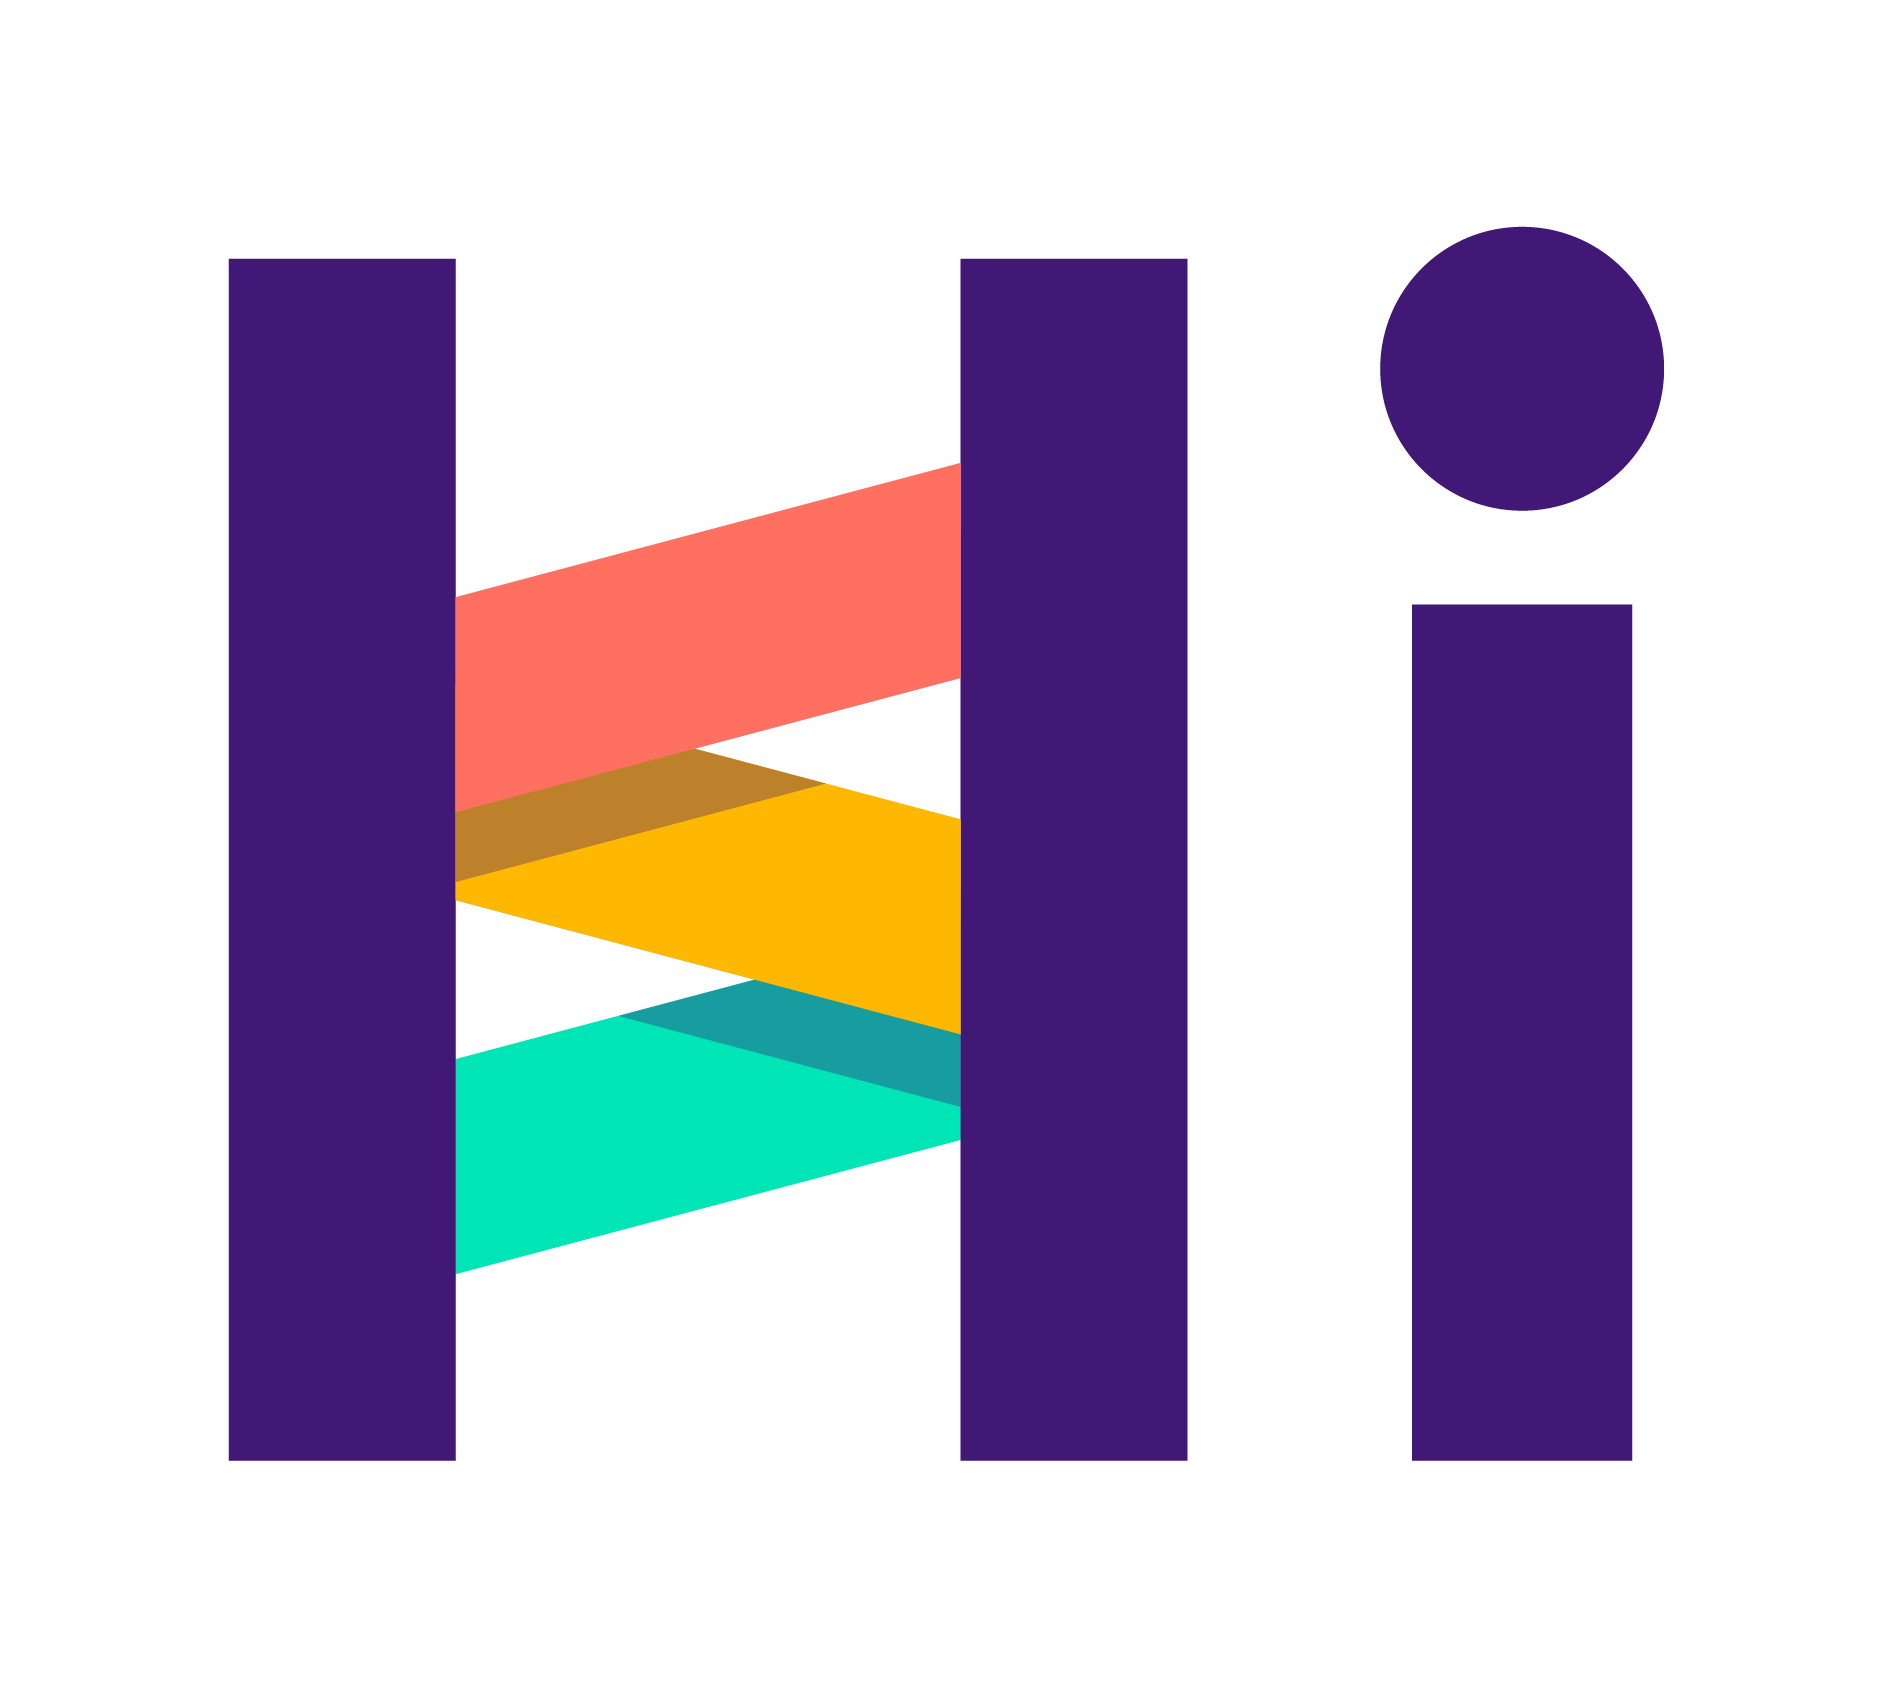

In [5]:
hiplot.Experiment.from_dataframe(data).to_html('exp_id6_ApplicationAnalysis_EndDistanceFixed_Visualization.html')

### Calculate key generation rate from fidelity

$$
\begin{equation}
    R = \text{max}(1 - 2H_{2}(\delta) ,0)
\end{equation}
$$


$$
\begin{equation}
    H_{2} = -\delta \log_{2}(\delta) -(1 - \delta) \log_{2}( 1- \delta)
\end{equation}
$$

$$
\begin{equation}
    F(\delta) = \frac{1}{4}( 1 + 3(1 - 2\delta)^2 )
\end{equation}
$$

From fidelity to bit flip rate is
$$
\begin{equation}
    \delta=  \frac{1}{2}\left(1 - \sqrt{\frac{4F - 1}{3}}\right)
\end{equation}
$$

In [5]:
def fidelity_to_bit_flip(F):
    return 0.5*(1 - np.sqrt( (4*F - 1)/3 ))

def bitflip_to_KGR(bitflip, numpy=False):
    
    # Calculate Key Generation Rate (KGR)
    H_2 = (-1*bitflip * np.log2(bitflip)) - (1 - bitflip)*np.log2(1 - bitflip)
    KGR = 1 - 2*H_2

    # Return KGR
    if not numpy:
        if KGR > 0:
            return KGR
        else:
            return 0
    else:
        return np.where(KGR < 0, 0, KGR)

def calculate_KGR(row):

    F = row['fidelity']
    bit_flip = fidelity_to_bit_flip(F)
    KGR = bitflip_to_KGR(bit_flip)
    return KGR

def calculate_bitflip(row):
    return fidelity_to_bit_flip(row['fidelity'])

def combine_error(row):
    return 

def throughput(row):
    return 9000/row['total time'] #['throughput (pair/sec)']

In [5]:
data = pd.read_csv('exp_id6_ApplicationAnalysis_EndDistanceFixed_Extracted_Data_modified.csv')
data = data.groupby(['index', 'experiment'], as_index=False).mean()
data = data.drop(labels=['index', 'trajectory'], axis=1)
data['Key Generation Rate'] = data.apply(lambda row: calculate_KGR(row), axis=1)
data['throughput (pair/sec)'] = data.apply(lambda row: throughput(row), axis=1)
# data['Bit flip rate'] = data.apply(lambda row: calculate_bitflip(row), axis=1)

In [12]:
data

loss rate  depolarizing rate  gate error rate  memory error  \
0           0.3              0.025            0.000          0.01   
1           0.3              0.025            0.000          0.01   
2           0.3              0.025            0.000          0.01   
3           0.3              0.025            0.000          0.01   
4           0.3              0.025            0.000          0.01   
...         ...                ...              ...           ...   
4495        0.3              0.025            0.002          0.01   
4496        0.3              0.025            0.002          0.01   
4497        0.3              0.025            0.002          0.01   
4498        0.3              0.025            0.002          0.01   
4499        0.3              0.025            0.002          0.01   

      measurement error  number of hops                 experiment  fidelity  \
0                  0.00               2                         0G  0.671167   
1                  0.00               2               E2E-1G-Ss-Dp  0.597000   
2                  0.00               2                   1G-Ss-Dp  0.453667   
3                  0.00               2       1-2G-DirectedEncoded  0.517000   
4                  0.00               2  HG-END2ENDPurifiedEncoded  0.841333   
...                 ...             ...                        ...       ...   
4495               0.01               8               E2E-1G-Ss-Dp  0.419667   
4496               0.01               8                   1G-Ss-Dp  0.511000   
4497               0.01               8       1-2G-DirectedEncoded  0.376000   
4498               0.01               8  HG-END2ENDPurifiedEncoded  0.444500   
4499               0.01               8            2G-NonLocalCNOT  0.309833   

      total time  fidelity estimation time  ... base Bell pairs attempted  \
0       5.354743                  5.353903  ...                    567986   
1      33.875033                 33.872267  ...                   3355619   
2      20.733360                 20.730447  ...                   2155792   
3      20.557717                 20.555550  ...                   2146276   
4      34.249467                 34.247640  ...                   3392374   
...          ...                       ...  ...                       ...   
4495    4.277245                  4.276807  ...                   1762062   
4496    0.818163                  0.818093  ...                    618987   
4497    0.878563                  0.878443  ...                    619902   
4498    4.200090                  4.199618  ...                   1730018   
4499    1.740030                  1.739795  ...                   1195470   

      distance  XX commute  XX anti-commute  YY commute  YY anti-commute  \
0          100        2405              595        2242              758   
1          100        2300              700        2116              884   
2          100        1970             1030        1813             1187   
3          100        2160              840        1899             1101   
4          100        2855              145        2566              434   
...        ...         ...              ...         ...              ...   
4495       100        2074              926        1666             1334   
4496       100        2264              736        1851             1149   
4497       100        1846             1154        1620             1380   
4498       100        2142              858        1703             1297   
4499       100        1661             1339        1541             1459   

      ZZ commute  ZZ anti-commute  Key Generation Rate  throughput (pair/sec)  
0           2380              620             0.000000            1680.752828  
1           2166              834             0.000000             265.682395  
2           1939             1061             0.000000             434.083043  
3           2043              957             0.000000    

In [ ]:
hiplot.Experiment.from_dataframe(data).display()

<IPython.core.display.Javascript object>

In [ ]:
# hiplot.Experiment.from_dataframe(data).to_html('exp_id6_ApplicationAnalysis_EndDistanceFixed_Visualization.html')

C:\Users\User\AppData\Local\Temp\ipykernel_1900\4023582579.py:7: RuntimeWarning: divide by zero encountered in log2
  H_2 = (-1*bitflip * np.log2(bitflip)) - (1 - bitflip)*np.log2(1 - bitflip)
C:\Users\User\AppData\Local\Temp\ipykernel_1900\4023582579.py:7: RuntimeWarning: invalid value encountered in multiply
  H_2 = (-1*bitflip * np.log2(bitflip)) - (1 - bitflip)*np.log2(1 - bitflip)


Text(0, 0.5, 'Key Generation Rate')

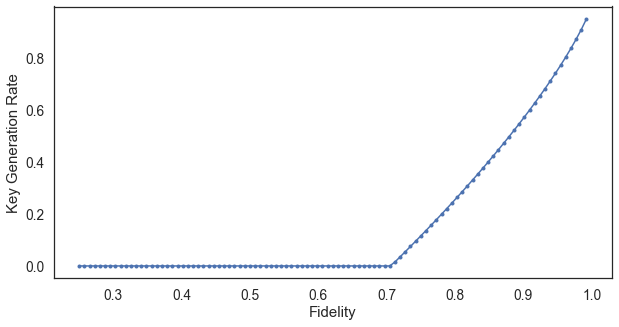

In [ ]:
F = np.linspace(0.25, 1, 100)
bit_flip = fidelity_to_bit_flip(F)
KGR = bitflip_to_KGR(bit_flip, numpy=True)

fig, axes = plt.subplot_mosaic([['A']], figsize=(10, 5))
axes['A'].plot(F, KGR, '.-')
axes['A'].set_xlabel('Fidelity')
axes['A'].set_ylabel('Key Generation Rate')

In [ ]:
bit_flip = fidelity_to_bit_flip(0.7063)

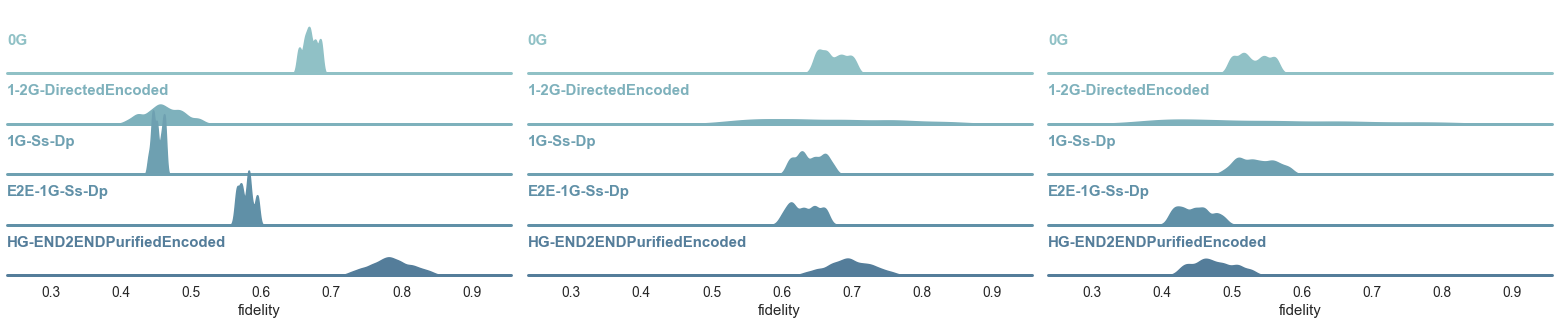

In [ ]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data, col='number of hops',
                  row="experiment", hue="experiment", 
                  aspect=7.5, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "fidelity",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
#g.map(sns.kdeplot, "fidelity", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=3, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.5, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "fidelity")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

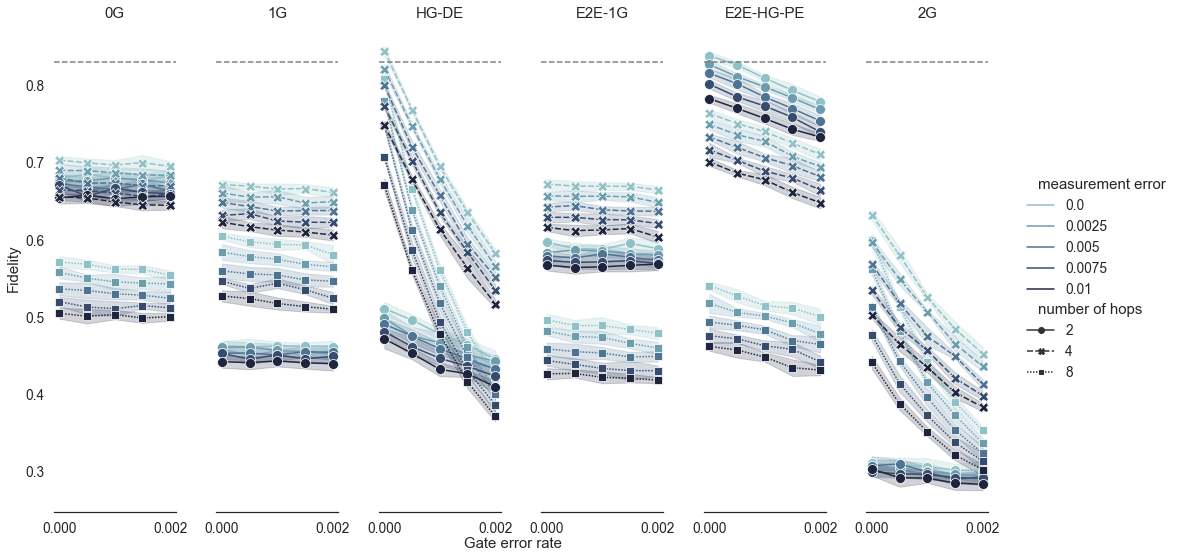

In [20]:
data = pd.read_csv('exp_id6_ApplicationAnalysis_EndDistanceFixed_Extracted_Data_modified.csv')
# data = data.groupby(['index', 'experiment'], as_index=False).mean()
data = data.drop(labels=['index', 'trajectory'], axis=1)
data['Key Generation Rate'] = data.apply(lambda row: calculate_KGR(row), axis=1)
data['throughput (pair/sec)'] = data.apply(lambda row: throughput(row), axis=1)

# Initialize the FacetGrid object1
sns.set_theme(style="white", font_scale=1.25, rc={"axes.facecolor": (0, 0, 0, 0), 'legend.facecolor': (1, 1, 1, 0)})
pal = sns.cubehelix_palette(5, rot=-.25, light=.7)
col_order = ['0G', '1G-Ss-Dp', '1-2G-DirectedEncoded', 'E2E-1G-Ss-Dp', 'HG-END2ENDPurifiedEncoded', '2G-NonLocalCNOT']
g = sns.relplot(
    data=data, x="gate error rate", y="fidelity", ci='sd', col_order=col_order,
    col="experiment", hue="measurement error", style="number of hops",
    kind="line", height=8, aspect=0.3, legend='full', palette=pal, 
    err_style='band', markers=True, linestyle='', markersize=10 # s=60 #, facet_kws={'legend_out':True}
)

# g.refline(y=0.78, linestyle='--') 
# g.refline(y=0.7063, linestyle='-')
g.refline(y=0.83, linestyle='--') # Sajeet et al.
for name in g.axes_dict:

    g.axes_dict[name].set_title(name_mapping[name])
    if name_mapping[name] == 'HG-DE':

        g.axes_dict[name].set_xlabel('Gate error rate')
        # Shift the x label to the right
        g.axes_dict[name].xaxis.set_label_coords(1.1, -0.05)
    else:
        g.axes_dict[name].set_xlabel('')

# Set the x-axis label in the middle
# g.set_xlabels('Gate error rate')

g.despine(bottom=False, left=True)

g.set_ylabels('Fidelity')
#sns.move_legend(g, "upper left", bbox_to_anchor=(0.05, 0.95), frameon=True)
#leg = Legend(g, handles, labels)
#g.add_legend()
g.tight_layout()
g.savefig('Figures/Fidelity_EndDistance_Fixed_2.pdf')

## Create mean and std of throughput (pair/sec) table 

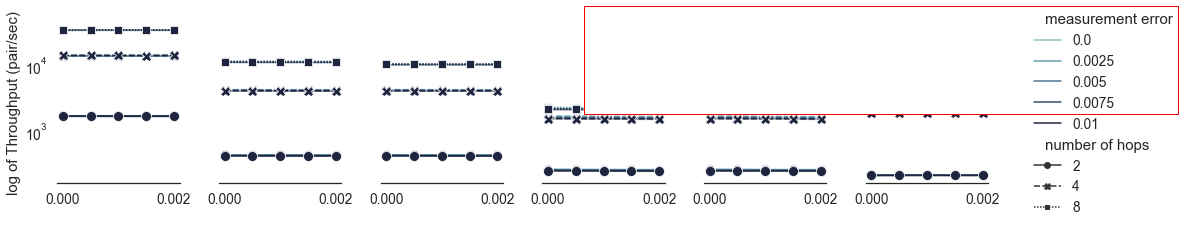

In [18]:
data = pd.read_csv('exp_id6_ApplicationAnalysis_EndDistanceFixed_Extracted_Data_modified.csv')
# data = data.groupby(['index', 'experiment'], as_index=False).mean()
data = data.drop(labels=['index', 'trajectory'], axis=1)
data['Key Generation Rate'] = data.apply(lambda row: calculate_KGR(row), axis=1)
data['throughput (pair/sec)'] = data.apply(lambda row: throughput(row), axis=1)
col_order = ['0G', '1G-Ss-Dp', '1-2G-DirectedEncoded', 'E2E-1G-Ss-Dp', 'HG-END2ENDPurifiedEncoded', '2G-NonLocalCNOT']
# Initialize the FacetGrid object1
sns.set_theme(style="white", font_scale=1.25, rc={"axes.facecolor": (0, 0, 0, 0), 'legend.facecolor': (1, 1, 1, 0)})
pal = sns.cubehelix_palette(5, rot=-.25, light=.7)

g = sns.relplot(
    data=data, x="gate error rate", y="throughput (pair/sec)", ci='sd', col_order=col_order,
    col="experiment", hue="measurement error", style="number of hops",
    kind="line", height=3, aspect=2.4/3, legend='full', palette=pal,
    err_style='band', markers=True, linestyle='', markersize=10
)

for name in g.axes_dict:
    g.axes_dict[name].set_title('')
    g.axes_dict[name].set_xlabel('')
    g.axes_dict[name].set(yscale='log')
    g.axes_dict[name].set_xticks([0.000, 0.002])

g.despine(bottom=False, left=True)

g.set_ylabels('log of Throughput (pair/sec)')
#sns.move_legend(g, "upper left", bbox_to_anchor=(0.05, 0.95), frameon=True)
#leg = Legend(g, handles, labels)
#g.add_legend()

# Create white box to cover the legend
# g.fig.add_artist(plt.Rectangle((0.5, 0.5), 0.5, 0.5, facecolor='white', edgecolor='red'))

g.tight_layout()
g.savefig('Figures/Throughput_EndDistance_Fixed_2.pdf')

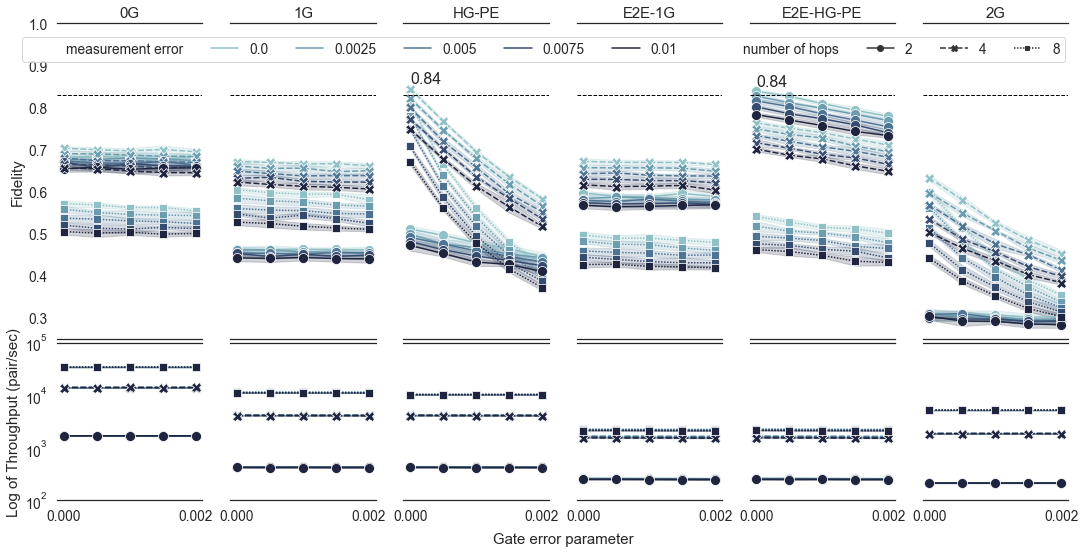

In [7]:
data = pd.read_csv('exp_id6_ApplicationAnalysis_EndDistanceFixed_Extracted_Data_modified.csv')
data = data.drop(labels=['index', 'trajectory'], axis=1)
data['Key Generation Rate'] = data.apply(lambda row: calculate_KGR(row), axis=1)
data['throughput (pair/sec)'] = data.apply(lambda row: throughput(row), axis=1)
col_order = ['0G', '1G-Ss-Dp', '1-2G-DirectedEncoded', 'E2E-1G-Ss-Dp', 'HG-END2ENDPurifiedEncoded', '2G-NonLocalCNOT']
# Initialize the FacetGrid object1
sns.set_theme(style="white", font_scale=1.25, rc={"axes.facecolor": (0, 0, 0, 0), 'legend.facecolor': (1, 1, 1, 0)})
pal = sns.cubehelix_palette(5, rot=-.25, light=.7)

# Plot dataframe data with seaborn where the columns are the different experiments
# And there are two rows of plots which are the fidelity and throughput

fig, axes = plt.subplots(2, 6, figsize=(15, 7.5), sharex=True, sharey=False, gridspec_kw={'height_ratios': [2, 1]})
for i, name in enumerate(col_order):
    # Plot the fidelity
    ax = sns.lineplot(
        data=data[data['experiment'] == name], x="gate error rate", y="fidelity", ci='sd',
        hue="measurement error", style="number of hops",
        ax=axes[0, i], palette=pal, err_style='band', markers=True, linestyle='', markersize=10
    )
    ax.set_title(name_mapping[name])
    ax.set_xlabel('')

    if name_mapping[name] == 'HG-PE':
        ax.set_xlabel('Gate error rate')
        # Shift the x label to the right
        ax.xaxis.set_label_coords(1.1, -0.05)

    if name_mapping[name] == "0G":
        ax.set_ylabel('Fidelity')
    else:
        ax.set_ylabel('')
        # Remove y tick
        ax.set_yticks([])
    ax.set_ylim(0.25, 1)
    # ax.set_xlim(0, 0.002)
    ax.set_xticks([0.000, 0.002])
    ax.legend().remove()
    # Remove vertical lines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Add horizontal lines of 0.83
    ax.axhline(y=0.83, color='black', linestyle='--', linewidth=1)
    
    # Average fidelity over trajectory
    data_avg = data[data['experiment'] == name].groupby(['gate error rate', 'measurement error', 'number of hops'], as_index=False).mean()
    # if average fidelity is more than 0.83, then annotate the point
    for index, row in data_avg.iterrows():
        if row['fidelity'] > 0.83:
            ax.annotate('%.2f' % row['fidelity'], xy=(row['gate error rate'], row['fidelity']), xytext=(0, 5), textcoords='offset points', fontsize=16)

    # Plot the throughput
    ax = sns.lineplot(
        data=data[data['experiment'] == name], x="gate error rate", y="throughput (pair/sec)", ci='sd',
        hue="measurement error", style="number of hops",
        ax=axes[1, i], palette=pal, err_style='band', markers=True, linestyle='', markersize=10
    )
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylim(100, 100000)
    ax.set_yscale('log')
    if name_mapping[name] == "0G":
        ax.set_ylabel('Log of Throughput (pair/sec)')
    else:
        ax.set_ylabel('')
        ax.set_yticks([])
    
    # ax.set_xlim(0, 0.002)
    ax.set_xticks([0.000, 0.002])
    # Remove vertical lines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.legend().remove()

    # Add xlabel
    if i == 2:
        ax.set_xlabel('Gate error parameter')
        # Shift the x label to the right
        ax.xaxis.set_label_coords(1.1, -0.2)
    

# Add the legend to the last plot
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=10, frameon=True, bbox_to_anchor=(0.5, 0.95))

# Reduce white space between subplots
# fig.subplots_adjust(wspace=0.00, hspace=0.00)

fig.tight_layout(pad=0.25)

plt.show()
fig.savefig('Figures/Combined_Plot_EndDistance_Fixed_4.pdf')


In [11]:
data = pd.read_csv('exp_id6_ApplicationAnalysis_EndDistanceFixed_Extracted_Data_modified.csv')
data['Key Generation Rate'] = data.apply(lambda row: calculate_KGR(row), axis=1)
data['throughput (pair/sec)'] = data.apply(lambda row: throughput(row), axis=1)
data

index  loss rate  depolarizing rate  gate error rate  memory error  \
0         0        0.3              0.025            0.000          0.01   
1         0        0.3              0.025            0.000          0.01   
2         0        0.3              0.025            0.000          0.01   
3         0        0.3              0.025            0.000          0.01   
4         0        0.3              0.025            0.000          0.01   
...     ...        ...                ...              ...           ...   
4495     74        0.3              0.025            0.002          0.01   
4496     74        0.3              0.025            0.002          0.01   
4497     74        0.3              0.025            0.002          0.01   
4498     74        0.3              0.025            0.002          0.01   
4499     74        0.3              0.025            0.002          0.01   

      measurement error  number of hops  trajectory  \
0                  0.00               2           0   
1                  0.00               2           0   
2                  0.00               2           0   
3                  0.00               2           0   
4                  0.00               2           0   
...                 ...             ...         ...   
4495               0.01               8           9   
4496               0.01               8           9   
4497               0.01               8           9   
4498               0.01               8           9   
4499               0.01               8           9   

                     experiment  fidelity  ...  base Bell pairs attempted  \
0                            0G  0.671167  ...                     567986   
1                  E2E-1G-Ss-Dp  0.597000  ...                    3355619   
2                      1G-Ss-Dp  0.453667  ...                    2155792   
3          1-2G-DirectedEncoded  0.517000  ...                    2146276   
4     HG-END2ENDPurifiedEncoded  0.841333  ...                    3392374   
...                         ...       ...  ...                        ...   
4495               E2E-1G-Ss-Dp  0.419667  ...                    1762062   
4496                   1G-Ss-Dp  0.511000  ...                     618987   
4497       1-2G-DirectedEncoded  0.376000  ...                     619902   
4498  HG-END2ENDPurifiedEncoded  0.444500  ...                    1730018   
4499            2G-NonLocalCNOT  0.309833  ...                    1195470   

      distance XX commute  XX anti-commute  YY commute  YY anti-commute  \
0          100       2405              595        2242              758   
1          100       2300              700        2116              884   
2          100       1970             1030        1813             1187   
3          100       2160              840        1899             1101   
4          100       2855              145        2566              434   
...        ...        ...              ...         ...              ...   
4495       100       2074              926        1666             1334   
4496       100       2264              736        1851             1149   
4497       100       1846             1154        1620             1380   
4498       100       2142              858        1703             1297   
4499       100       1661             1339        1541             1459   

      ZZ commute  ZZ anti-commute  Key Generation Rate  throughput (pair/sec)  
0           2380              620             0.000000            1680.752828  
1           2166              834             0.000000             265.682395  
2           1939             1061             0.000000             434.083043  
3           2043              957             0.000000             437.791811  
4           2627              373             0.377057             262.777815  
...          ...              ...                  ...                    ...  
4495        1778             1222             

In [12]:
def mean_std(x):
    mean = np.mean(x)
    std = np.std(x)
    return f'{int(mean.round(0))} +- {int(std.round(0))}'

throughput__summary_table = pd.pivot_table(data, 
                                           values=['throughput (pair/sec)'], 
                                           index=['experiment'], columns=['number of hops'], 
                                           aggfunc={'throughput (pair/sec)': mean_std})
throughput__summary_table

throughput (pair/sec)                           
number of hops                                2            4             8
experiment                                                                
0G                                   1684 +- 12  13962 +- 70  34063 +- 122
1-2G-DirectedEncoded                   427 +- 6   4149 +- 60   10261 +- 13
1G-Ss-Dp                               427 +- 6   4152 +- 60  11233 +- 163
2G-NonLocalCNOT                        212 +- 1    1858 +- 3     5173 +- 5
E2E-1G-Ss-Dp                           255 +- 5   1603 +- 55    2185 +- 57
HG-END2ENDPurifiedEncoded              254 +- 5   1602 +- 54    2187 +- 59

In [13]:
throughput__summary_table.to_excel('TableResults/Throughput_multi_hops.xlsx')

In [27]:
print(throughput__summary_table.style.to_latex())

\begin{tabular}{llll}
 & \multicolumn{3}{r}{throughput (pair/sec)} \\
number of hops & 2 & 4 & 8 \\
experiment &  &  &  \\
0G & 1684 +- 12 & 13962 +- 70 & 34063 +- 122 \\
1-2G-DirectedEncoded & 427 +- 6 & 4149 +- 60 & 10261 +- 13 \\
1G-Ss-Dp & 427 +- 6 & 4152 +- 60 & 11233 +- 163 \\
2G-NonLocalCNOT & 212 +- 1 & 1858 +- 3 & 5173 +- 5 \\
E2E-1G-Ss-Dp & 255 +- 5 & 1603 +- 55 & 2185 +- 57 \\
HG-END2ENDPurifiedEncoded & 254 +- 5 & 1602 +- 54 & 2187 +- 59 \\
\end{tabular}



In [24]:
for i in throughput__summary_table[('throughput (pair/sec)', 2)]:
    print(i)

1684 +- 12
427 +- 6
427 +- 6
212 +- 1
255 +- 5
254 +- 5


In [21]:
throughput__summary_table.index

Index(['0G', '1-2G-DirectedEncoded', '1G-Ss-Dp', '2G-NonLocalCNOT',
       'E2E-1G-Ss-Dp', 'HG-END2ENDPurifiedEncoded'],
      dtype='object', name='experiment')

In [14]:
throughput__summary_table.to_clipboard()

In [ ]:
s = ''
for i in data['gate error rate'].unique():
    s += f'{i},'
print(s)

0.0,0.0005,0.001,0.0015,0.002,


In [ ]:
s = ''
for i in data['measurement error'].unique():
    s += f'{i},'
print(s)


0.0,0.0025,0.005,0.0075,0.01,


In [9]:
p_dep = 0.025
F = (p_dep**2)/3 + ( 1- p_dep**2)**2
print(F)

0.9989587239583334
